2

In [53]:
dt <- read.csv('Social_Network_Ads.csv')
str(dt)
summary(dt)

'data.frame':	400 obs. of  5 variables:
 $ User.ID        : int  15624510 15810944 15668575 15603246 15804002 15728773 15598044 15694829 15600575 15727311 ...
 $ Gender         : chr  "Male" "Male" "Female" "Female" ...
 $ Age            : num  19 35 26 27 19 27 27 32 25 35 ...
 $ EstimatedSalary: num  19000 20000 43000 57000 76000 58000 84000 150000 33000 65000 ...
 $ Purchased      : int  0 0 0 0 0 0 0 1 0 0 ...


    User.ID            Gender               Age        EstimatedSalary 
 Min.   :15566689   Length:400         Min.   :18.00   Min.   : 15000  
 1st Qu.:15626764   Class :character   1st Qu.:29.75   1st Qu.: 43000  
 Median :15694342   Mode  :character   Median :37.00   Median : 70000  
 Mean   :15691540                      Mean   :37.66   Mean   : 69742  
 3rd Qu.:15750363                      3rd Qu.:46.00   3rd Qu.: 88000  
 Max.   :15815236                      Max.   :60.00   Max.   :150000  
   Purchased     
 Min.   :0.0000  
 1st Qu.:0.0000  
 Median :0.0000  
 Mean   :0.3575  
 3rd Qu.:1.0000  
 Max.   :1.0000  

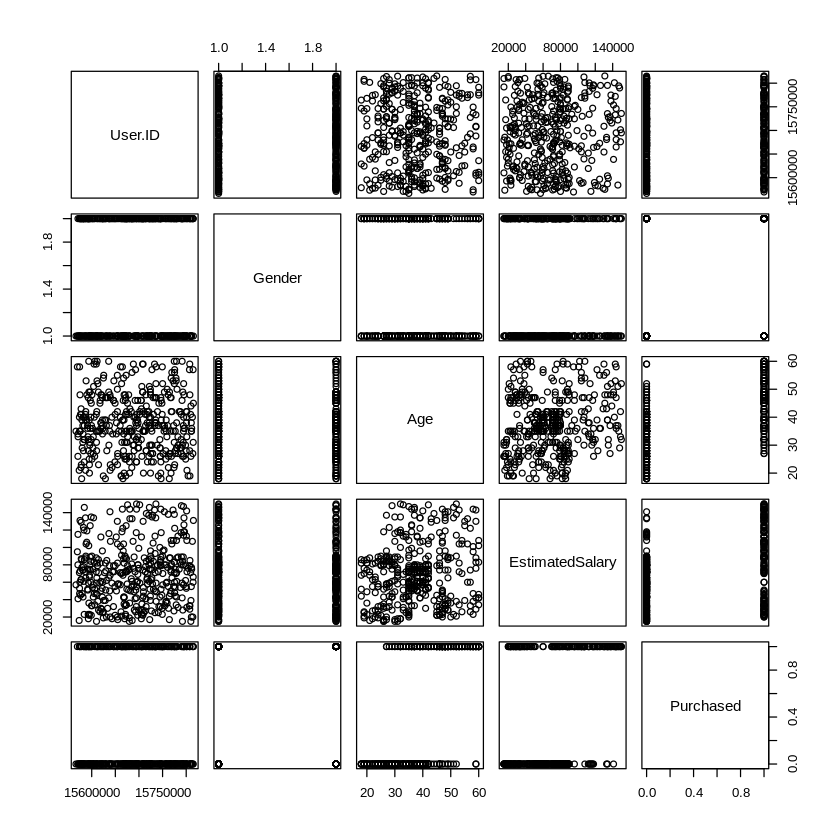

In [54]:
plot(dt)

3

In [55]:
install.packages('caTools')
library(caTools) # install it first in the console
set.seed(123)
# we use the function set.seed() with the same seed number
# to randomly generate the same values, you already know that right? 
#and you know why we want to generate the same values, am I wrong? 
split = sample.split(dt$Purchased, SplitRatio = 0.75)
# here we chose the SplitRatio to 75% of the dataset,
# and 25% for the test set.
training_set = subset(dt, split == TRUE)
# we use subset to split the dataset
test_set = subset(dt, split == FALSE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



4

Scaling the dataset is the same as normalizing the dataset.

In [56]:
training_set[c(3,4)] = scale(training_set[c(3,4)])
test_set[c(3,4)] = scale(test_set[c(3,4)])

5

In [57]:
m1  =  glm(Purchased ~ Age,data = training_set, family = binomial)

6

We use the binomial family because for a logistic regression it follows a bernouilli law, however bernouilli is a binomial law with the parameter n equals to 1

7

Y = exp(b0 + b1X)/(1 + exp(b0 + b1X)),
where Y corresponds to the Puchased variable and X the Age variable 

In [58]:
summary(m1)


Call:
glm(formula = Purchased ~ Age, family = binomial, data = training_set)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5341  -0.6641  -0.2950   0.5437   2.4392  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.9299     0.1672  -5.562 2.67e-08 ***
Age           1.9913     0.2342   8.502  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 390.89  on 299  degrees of freedom
Residual deviance: 252.11  on 298  degrees of freedom
AIC: 256.11

Number of Fisher Scoring iterations: 5


The P-value is inferior to 0,05 thus the valiable Age is significant

9

AIC = 256,11

10

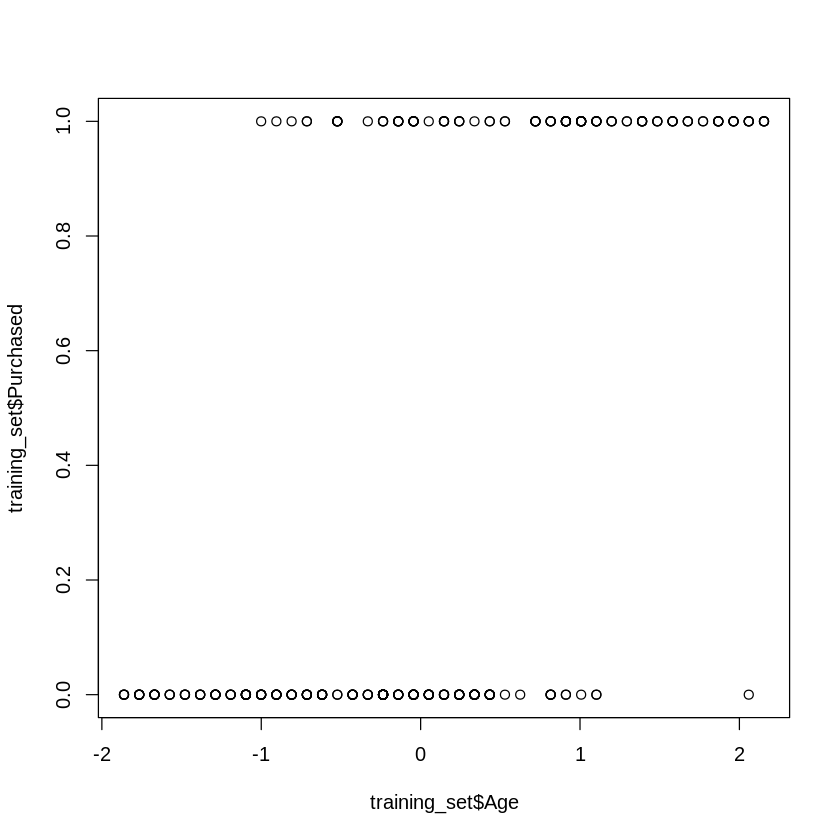

In [59]:
plot(training_set$Age,training_set$Purchased)

`geom_smooth()` using formula 'y ~ x'



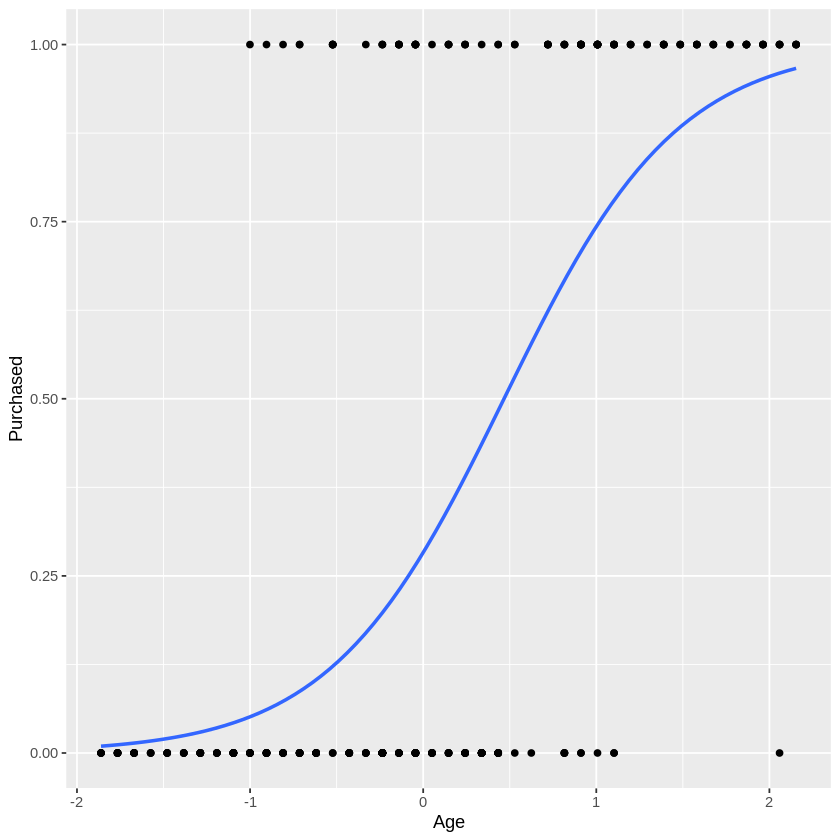

In [60]:
library(ggplot2)
ggplot(m1, aes(x=Age, y=Purchased)) + geom_point() +
  stat_smooth(method="glm", method.args=list(family="binomial"), se=FALSE)

11

In [61]:
m2  =  glm(Purchased ~ Age + EstimatedSalary,data = training_set, family = binomial)

In [62]:
summary(m2)


Call:
glm(formula = Purchased ~ Age + EstimatedSalary, family = binomial, 
    data = training_set)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0753  -0.5235  -0.1161   0.3224   2.3977  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -1.1923     0.2018  -5.908 3.47e-09 ***
Age               2.6324     0.3461   7.606 2.83e-14 ***
EstimatedSalary   1.3947     0.2326   5.996 2.03e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 390.89  on 299  degrees of freedom
Residual deviance: 199.78  on 297  degrees of freedom
AIC: 205.78

Number of Fisher Scoring iterations: 6


12 and 13

The model is significant as the P-values or inferior to 0.05
we could also notice that the AIC is inferior to the previous one (205,78 compare to 256,11)
which means that it is a better model.

14

In [63]:
y_hat= predict(m2, newdata  = test_set[c(3,4)], type = "response")

15

In [64]:
y_hat_modified = ifelse(y_hat>0.5,1,0)

16

In [65]:
confusion_matrix = table(y_hat_modified,test_set$Purchased)

17

In [66]:
All_metrics = function(confusion_matrix){
accuracy = (confusion_matrix[1]+confusion_matrix[4])/sum(confusion_matrix)
sensitifity = confusion_matrix[1]/(confusion_matrix[1]+confusion_matrix[2])
specificity = confusion_matrix[4]/(confusion_matrix[4]+confusion_matrix[3])
precision = confusion_matrix[1]/(confusion_matrix[1]+confusion_matrix[3])
return(list(accuracy = accuracy, sensitifity= sensitifity,specificity = specificity,precision = precision))}

All_metrics(confusion_matrix)

$accuracy
[1] 0.83

$sensitifity
[1] 0.890625

$specificity
[1] 0.7222222

$precision
[1] 0.8507463

18

In [67]:
install.packages('ROCR')
library(ROCR)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [68]:
values = prediction(y_hat, test_set$Purchased)

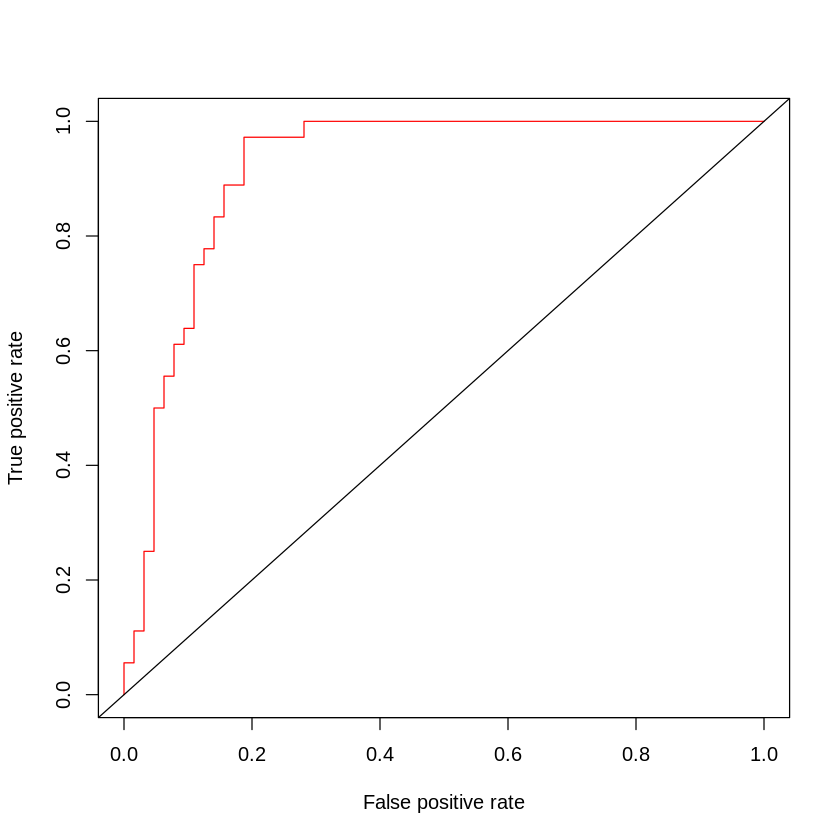

In [69]:
plot(performance(values,'tpr','fpr'),col="red")
#tpr means true positive rate which correspond to the sensitivity
#fpr means false positive rate which correspond to the fall-out
abline(0,1)

In [70]:
auc = performance(values,'auc')
auc = auc@y.values[[1]]
auc

[1] 0.9171007

19

In [71]:
y_hat_m1 = predict(m1,newdata = test_set[c(3,4)],type = 'response')

In [72]:
y_hat_m1_modified = ifelse(y_hat_m1>0.5,1,0)

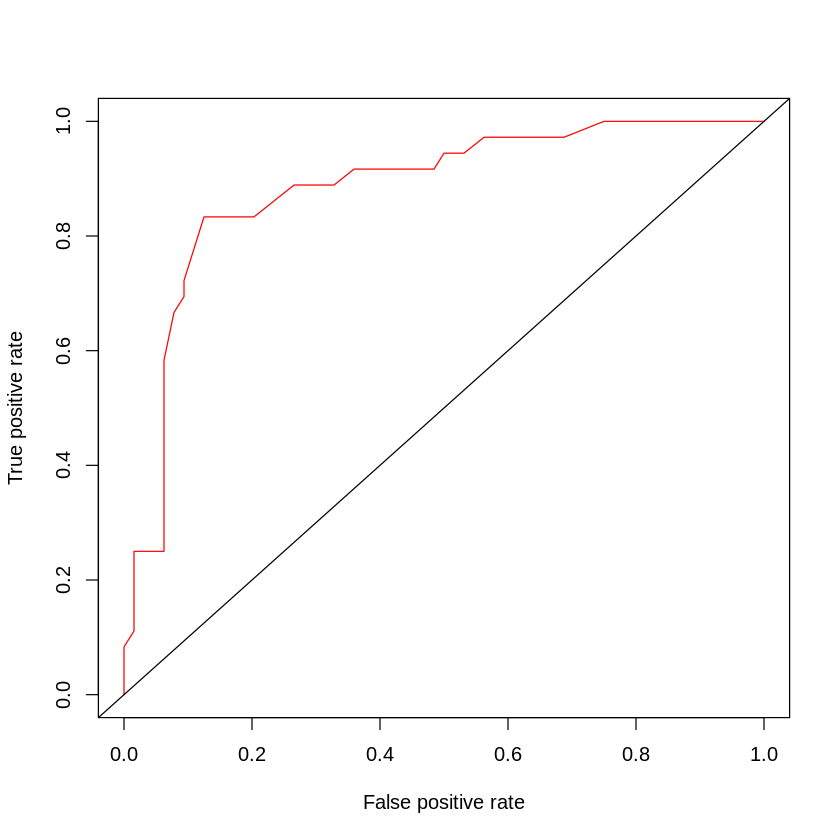

In [73]:
values_m1 = prediction(y_hat_m1, test_set$Purchased)
plot(performance(values_m1,'tpr','fpr'),col="red")
#tpr means true positive rate which correspond to the sensitivity
#fpr means false positive rate which correspond to the fall-out
abline(0,1)

In [74]:
auc = performance(values_m1,'auc')
auc = auc@y.values[[1]]
auc

[1] 0.8823785

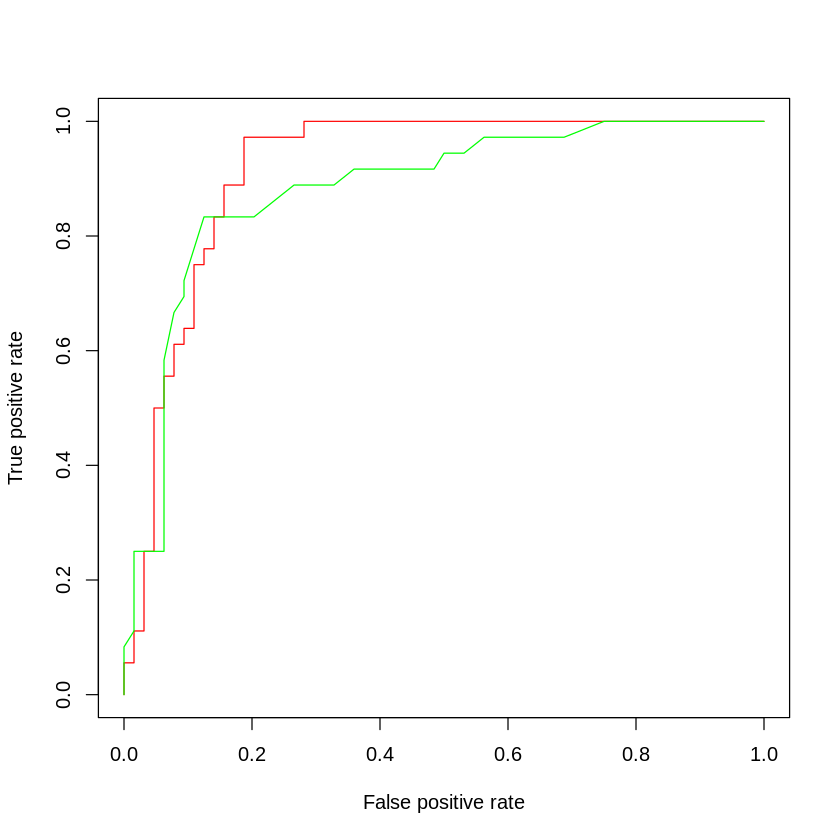

In [76]:
plot(performance(values,'tpr','fpr'),col="red")
plot(performance(values_m1,'tpr','fpr'),col="green",add = TRUE)